In [1]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import pandas as pd 
import numpy as np
import warnings
warnings.filterwarnings('ignore')

#Classification model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,GradientBoostingClassifier,HistGradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier
import xgboost as xgb

#Classification report 
from scipy import stats
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

In [2]:
df=pd.read_csv('Breast_Cancer', sep=" ")
pd.set_option('display.max_columns', None)
df

,CancerStatus,age,ethnic,race,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55
Patient1,2,53,1,0,1,9,39.1410,48.0,37.800000,15.300000,20.800000,79.000000,4.057300,116.840,127.00,0,0,0,0,0,1,1,1.5748,97.070,0.92000,1,1,0,0,0,5.10950,4.9795,1.0,1.000000,0.00000,1.0,0.610000,16.60000,13.3,38.4,7.5,352.0,12.0000,0.80000,0.6,54,65,0,1,21.846937,1,1,1,36.827295,32.690615,0
Patient2,1,56,1,0,1,5,20.8307,36.0,62.029112,29.662459,22.995738,88.964638,5.470976,73.660,100.33,1,0,1,1,0,1,1,1.7018,60.328,0.73418,1,1,0,0,0,4.32640,9.5753,1.0,1.000000,1.00000,0.0,0.650000,24.91445,12.6,36.5,6.0,220.0,11.4688,0.76768,0.4,12,10,1,0,48.566990,0,1,1,39.632814,23.931963,0
Patient3,1,56,1,0,1,12,36.8061,36.0,64.600000,16.700000,24.400000,85.000000,5.121000,114.300,119.38,1,0,1,0,0,1,0,1.7018,106.595,0.95745,1,1,0,0,1,17.82140,12.6058,1.0,1.000000,0.00000,0.0,7.651288,25.80000,12.9,37.1,5.0,300.0,19.0000,1.00000,0.5,24,46,1,1,39.070475,1,0,0,48.699424,28.327078,0
Patient4,1,51,1,0,0,11,20.2546,9.0,45.700000,96.600000,5.000000,86.000000,1.061700,66.040,96.52,0,0,0,1,1,1,1,1.6256,53.524,0.68421,1,0,0,1,1,18.45790,23.3626,1.0,1.000000,1.00000,1.0,11.500000,13.30000,12.3,35.9,7.2,241.0,19.0000,0.80000,0.6,20,19,1,0,23.878054,0,0,0,36.121686,27.569074,0
Patient5,2,61,0,0,1,9,30.0759,9.0,15.200000,49.500000,94.100000,117.000000,27.184400,93.980,104.14,1,0,1,0,0,0,0,1.5240,69.854,0.90244,1,1,0,1,0,14.11490,9.0776,0.0,0.000000,0.00000,1.0,20.500000,88.70000,13.8,42.8,9.0,220.0,12.0000,0.60000,0.2,38,43,1,0,45.926343,1,1,0,35.503616,22.597512,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Patient535,-1,50,0,0,0,16,23.5299,36.0,48.900000,27.200000,12.200000,86.000000,2.590600,82.550,101.60,0,0,0,0,0,1,1,1.6891,67.132,0.81250,1,0,0,0,0,12.87350,19.7196,1.0,1.000000,1.00000,0.0,8.700000,11.50000,13.2,34.2,4.5,193.0,10.0000,0.90000,0.6,21,17,0,1,46.816012,1,1,0,40.150330,21.914237,0
Patient536,-1,47,1,0,0,21,43.9334,17.0,80.400000,27.000000,55.500000,87.500000,11.990700,134.620,137.16,0,0,0,1,1,1,1,1.8034,142.883,0.98148,1,0,0,0,0,30.40130,8.0730,1.0,1.000000,0.00000,1.0,27.000000,92.90000,14.3,41.2,11.1,321.0,9.0000,0.80000,0.3,34,46,1,0,46.499888,1,1,0,31.046246,38.203649,0
Patient537,-1,54,1,0,1,12,48.4211,48.0,34.600000,36.100000,21.800000,85.500000,4.602200,128.905,146.05,1,1,1,1,1,0,0,1.6764,136.079,0.88261,1,1,0,0,0,13.46550,9.0180,1.0,1.000000,0.00000,0.0,6.000000,39.30000,13.0,40.5,9.3,284.0,10.0000,0.80000,0.2,38,31,1,1,31.518352,1,1,0,41.037512,30.438491,1
Patient538,-1,52,1,0,0,20,51.3719,24.0,38.300000,15.200000,13.900000,78.000000,2.677000,139.700,142.24,1,1,0,1,0,0,0,1.7018,148.780,0.98214,1,0,0,0,1,5.80000,7.6877,1.0,1.000000,1.00000,0.0,6.800000,17.60000,13.4,39.8,5.6,323.0,13.0000,0.80000,0.5,44,68,1,0,43.856178,1,0,0,20.213651,41.817134,0


### Our target is the first column of the dataset"CancerStatus"
### Cancer status=1 means Diagnosed with Breast Cancer, Cancer status=1 means 2-Not Diagnosed
### Cancer status = -1 means the patient are not tested yet, therefore those patients are our target to predict.



# The Challenges of this dataset
### 1.high dimension and small sample size (Only 300 obsevations with known label, 55 predictors)
### 2.Many outliers exist in the dataset

In [3]:
df['CancerStatus'].value_counts()
# There are 239 patients are not tested
# There are only 300 observation can used to train the model

-1    239
 2    162
 1    138
Name: CancerStatus, dtype: int64

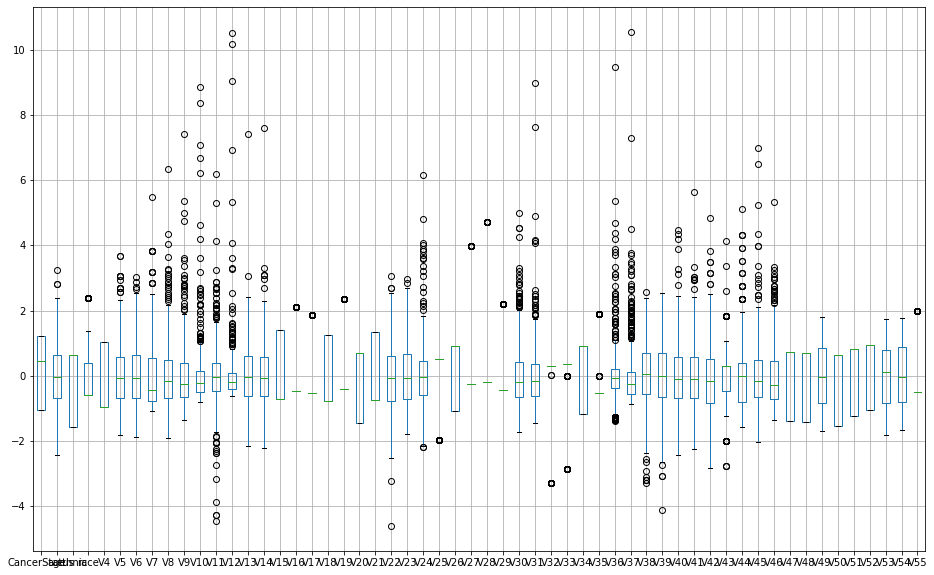

In [4]:
#Create a normalized dataset in order to visulize the number of outliers in dataset
normalized_df=(df.copy()-df.mean())/df.std()
normalized_df.boxplot(figsize=(16,10));
#There are many outliers exist in different columns
# And we cannot simply remove it from our dataset, because we only have 300 known observations 

In [5]:
#predict df are the unknown obsevations and it will be predicted after the model is well trained 
predict_df=df.iloc[300:,:].copy()
train_df=df.iloc[:300,:].copy()

In [6]:
#seperate the predictors and labels

X=train_df.iloc[:,1:].copy()
Y=train_df.iloc[:,0].copy()

X_test=predict_df.iloc[:,1:].copy()
Y_test=predict_df.iloc[:,0].copy()

X_train=X.copy()
y_train=Y.copy()

(300, 55)

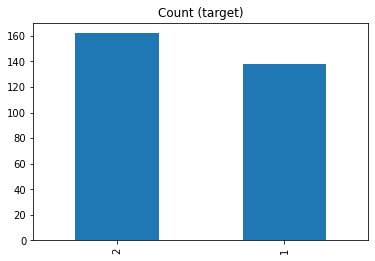

In [7]:
#We can see that the dataset is unbalanced
# therefore oversampling will be used to balance the dataset and it increases the number of obesevation.

y_train.value_counts().plot(kind='bar', title='Count (target)')
X_train.shape

### Oversampling 

(324, 55)

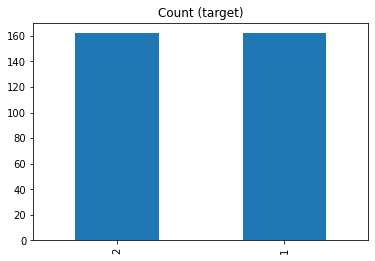

In [8]:
from imblearn.over_sampling import RandomOverSampler
labels=X_train.columns
oversample = RandomOverSampler(sampling_strategy='minority')
New_X, New_y = oversample.fit_resample(X_train, y_train)
oversampled_df= pd.DataFrame(New_X, columns=labels).copy()
oversampled_df['CancerStatus'] = New_y.copy()
oversampled_df['CancerStatus'].value_counts().plot(kind='bar', title='Count (target)');
oversampled_df.shape
X_train=New_X.copy()
y_train=New_y.copy()
X_train.shape

#random oversampling is used instead of SMOTE(Synthetic Minority Over-sampling Technique)
# It is because the training performance of models are worse after implementing SMOTE 
# It can be explained that there are many categorical columns with binary value in dataset 
# The way of SMOTE creating new observations similar with KNN, averaging 5 closest obesevation 
# which might create different value in the binary valued column.

# After implementing  random oversampling, the training accuracy of each model improved around 3-4%

### Model selection by cross validation

In [9]:
each_model = {"LogisiticRegression": LogisticRegression(), 
    "DecisionTreeClassifier": DecisionTreeClassifier()
    ,'RandomForestClassifier':RandomForestClassifier()
    ,'AdaBoostClassifier':AdaBoostClassifier(),
    'GaussianNB':GaussianNB(),
    'GaussianProcessClassifier':GaussianProcessClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'XGBoots':xgb.XGBClassifier(),'HistGradientBoostingClassifier':HistGradientBoostingClassifier()}

In [10]:
for name, stat_model in each_model.items():    
    stat_model.fit(X_train,y_train)
    score = cross_val_score(stat_model, X_train,y_train, cv=5)
    print("Model: ", stat_model.__class__.__name__, " Accuracy:", np.mean(score).round(2),'with standard deviation:'
          ,np.std(score).round(2),'\n')

Model:  LogisticRegression  Accuracy: 0.63 with standard deviation: 0.1 

Model:  DecisionTreeClassifier  Accuracy: 0.78 with standard deviation: 0.06 

Model:  RandomForestClassifier  Accuracy: 0.74 with standard deviation: 0.06 

Model:  AdaBoostClassifier  Accuracy: 0.75 with standard deviation: 0.05 

Model:  GaussianNB  Accuracy: 0.67 with standard deviation: 0.07 

Model:  GaussianProcessClassifier  Accuracy: 0.5 with standard deviation: 0.03 

Model:  GradientBoostingClassifier  Accuracy: 0.79 with standard deviation: 0.05 

[16:32:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:32:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation 

### GradientBoosting Classifier,
### adaBoost Classifier,
### RandomForestClassifier,
### DecisionTreeClassifier are choosen.

# Hyperparameter tunning


### The maximum of hyperparameter available is limited 
### in order to reduce the likelihood of overfitting


In [30]:
#Ada boosting
crossvalidation=KFold(n_splits=5,shuffle=True,random_state=1)
ada=AdaBoostClassifier()
search_grid={'n_estimators':[40,50,100,125,150],'learning_rate':[0.05,0.1,0.15,0.2]}
search=GridSearchCV(estimator=ada,param_grid=search_grid,scoring='accuracy',n_jobs=1,cv=crossvalidation)
search.fit(X_train,y_train)
search.best_params_

{'learning_rate': 0.1, 'n_estimators': 150}

In [31]:
### pass the best parameter to the model
### And the performance of model is valuated by 5 fold cross validation
kwargs=search.best_params_
ada_cv=AdaBoostClassifier(**kwargs)
scores = cross_val_score(ada_cv, X_train, y_train, cv=KFold(n_splits=5))
avg_score = np.mean(scores)
std=np.std(scores)
print('average score of AdaBoost:',np.round(avg_score,2))
print('standard deviatin of AdaBoost:', np.round(std,2))

average score of AdaBoost: 0.81
standard deviatin of AdaBoost: 0.08


In [32]:
GBC=GradientBoostingClassifier()

n_estimators =[40,50,60,70,80,90,100,110,120,150]

params = {'n_estimators':n_estimators,'criterion':['friedman_mse']
,'loss':["exponential"]}

GBC_search = GridSearchCV(estimator=GBC,  param_grid=params, 
                           cv=5, n_jobs=-1, verbose=1, scoring = "accuracy")
GBC_search.fit(X_train, y_train)
GBC_search.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


{'criterion': 'friedman_mse', 'loss': 'exponential', 'n_estimators': 150}

In [33]:
kwargs=GBC_search.best_params_
GBC_cv=GradientBoostingClassifier(**kwargs)
scores_GBC = cross_val_score(GBC_cv, X_train, y_train, cv=KFold(n_splits=5))
avg_score = np.mean(scores_GBC)
std=np.std(scores_GBC)
print('average score of GBC:',np.round(avg_score,2))
print('standard deviatin of GBC:', np.round(std,2))

average score of GBC: 0.79
standard deviatin of GBC: 0.08


In [34]:
HGBC=HistGradientBoostingClassifier()

loss=['auto']

max_depth=[9,10,11,12,13,14,15]
max_leaf_nodes=[9,10,12,15,20,30,40,50,60]

params ={'max_depth':max_depth,'loss':loss,'max_leaf_nodes':max_leaf_nodes}
HGBC_search = GridSearchCV(estimator=HGBC, param_grid=params, cv=5, n_jobs=-1, verbose=1, scoring = "accuracy")

HGBC_search.fit(X_train, y_train)
HGBC_search.best_params_

Fitting 5 folds for each of 63 candidates, totalling 315 fits


{'loss': 'auto', 'max_depth': 9, 'max_leaf_nodes': 10}

In [35]:
kwargs=HGBC_search.best_params_
HGBC_cv=HistGradientBoostingClassifier(**kwargs)
scores_HGBC = cross_val_score(HGBC_cv, X_train, y_train, cv=KFold(n_splits=5))
avg_score = np.mean(scores_HGBC)
std=np.std(scores_HGBC)
print('average score of HGBC:',np.round(avg_score,2))
print('standard deviatin of HGBC:', np.round(std,2))

average score of HGBC: 0.81
standard deviatin of HGBC: 0.05


### because HGBC has the best training accuracy and the lowest standard deviation
### HGBC is used to predict the final result

# Final prediction

In [20]:
kwargs=HGBC_search.best_params_
final_model=HistGradientBoostingClassifier(**kwargs)
final_model.fit(X_train,y_train)
prediction=final_model.predict(X_test)

In [36]:
final_pred=pd.DataFrame()
final_pred['id']=list(range(301,540))
final_pred['id']='Patient'+ final_pred['id'].astype(str)
final_pred['class']=prediction
final_pred

,id,class
0,Patient301,2
1,Patient302,2
2,Patient303,2
3,Patient304,2
4,Patient305,1
...,...,...
234,Patient535,1
235,Patient536,2
236,Patient537,1
237,Patient538,2
